In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import matplotlib.pyplot as plt
import torch.optim as optim


from dataloader import CustomImageDataset

In [3]:
# Define the transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize to 224x224
    transforms.ToTensor()
])

# Create the dataset and dataloader

class_to_idx = {'sma': 1, 'non-sma': 0}

# Get current directory
current_directory = os.getcwd()

# Relative directory of images
other_string = "Red_Cell_Morphology 2/"

# Combine directpries
new_path = os.path.join(current_directory, other_string)

# Create dataset
dataset = CustomImageDataset(root_dir=new_path, class_to_idx=class_to_idx, transform=transform)

# Create data loader
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

Class: non-SMA, Number of images: 10


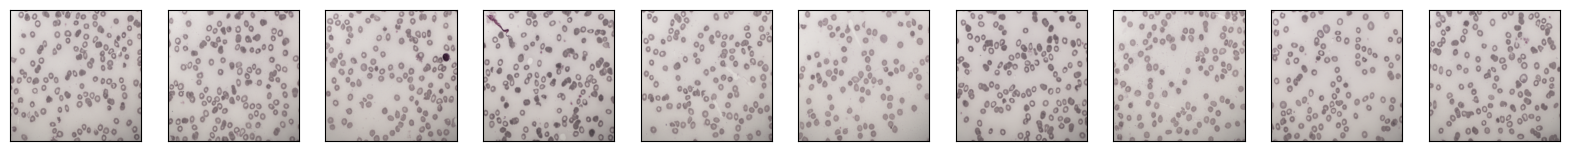

In [4]:
# Fetch first bag from the DataLoader
images, label = next(iter(data_loader))

print(f"Class: {'SMA' if label.item()==1 else 'non-SMA'}, Number of images: {len(images)}")

# Display all images from this bag
fig = plt.figure(figsize=(20, 10))  # adjust size as needed
for i in range(len(images)):
    ax = fig.add_subplot(1, len(images), i+1, xticks=[], yticks=[])
    img = images[i].squeeze().permute(1, 2, 0)  
    ax.imshow(img.numpy())
plt.show()

In [5]:
# Iterate through the data loader
for images, label in data_loader:
    # Iterate through each image in the bag
    for i in range(len(images)):
        print(f"Image {i+1} dimensions: {images[i].size()}")

Image 1 dimensions: torch.Size([1, 3, 224, 224])
Image 2 dimensions: torch.Size([1, 3, 224, 224])
Image 3 dimensions: torch.Size([1, 3, 224, 224])
Image 4 dimensions: torch.Size([1, 3, 224, 224])
Image 5 dimensions: torch.Size([1, 3, 224, 224])
Image 6 dimensions: torch.Size([1, 3, 224, 224])
Image 7 dimensions: torch.Size([1, 3, 224, 224])
Image 8 dimensions: torch.Size([1, 3, 224, 224])
Image 9 dimensions: torch.Size([1, 3, 224, 224])
Image 10 dimensions: torch.Size([1, 3, 224, 224])
Image 11 dimensions: torch.Size([1, 3, 224, 224])
Image 1 dimensions: torch.Size([1, 3, 224, 224])
Image 2 dimensions: torch.Size([1, 3, 224, 224])
Image 3 dimensions: torch.Size([1, 3, 224, 224])
Image 4 dimensions: torch.Size([1, 3, 224, 224])
Image 5 dimensions: torch.Size([1, 3, 224, 224])
Image 1 dimensions: torch.Size([1, 3, 224, 224])
Image 2 dimensions: torch.Size([1, 3, 224, 224])
Image 3 dimensions: torch.Size([1, 3, 224, 224])
Image 4 dimensions: torch.Size([1, 3, 224, 224])
Image 5 dimensions

KeyboardInterrupt: 

In [13]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64*540*640, 500)  # Adjusted for input image size 2160*2560
        self.fc2 = nn.Linear(500, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [14]:
# Initialize the network and optimizer
net = SimpleCNN()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Function to perform max pooling over feature vectors
def max_pool_feature_vectors(feature_vectors):
    return torch.max(feature_vectors, 0)[0]

# Training loop
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        feature_vectors = [net(image.unsqueeze(0)) for image in inputs]
        feature_vectors = torch.stack(feature_vectors)
        pooled_vector = max_pool_feature_vectors(feature_vectors)
        
        # Assuming a binary classification problem
        target = torch.FloatTensor([1]) if labels[0] == 1 else torch.FloatTensor([0])
        loss = F.binary_cross_entropy_with_logits(pooled_vector, target)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2 == 1:    # print every 2 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2))
            running_loss = 0.0

print('Finished Training')

: 

: 